# Dataset Information

| Column Name | Description | Data Type |
| --- | --- | --- |
| Gender | Laki-laki atau Wanita | Binary (Male/Female) |
| Age | Usia seseorang dalam tahun | Numeric |
| Height | Tinggi dalam meter | Numeric |
| Weight | Berat dalam kilogram | Numeric |
| family_history_with_overweight | Apakah orang tersebut memiliki riwayat keluarga dengan kelebihan | berat badan | Binary (yes/no) |
| FAVC | Jika orang tersebut sering mengonsumsi makanan berkalori tinggi (ya/tidak) | Binary (yes/no) |
| FCVC | Frekuensi konsumsi sayuran (skala dari 1 hingga 3) | Numeric |
| NCP | Jumlah makanan utama per hari | Numeric |
| CAEC | Frekuensi mengonsumsi makanan di antara waktu makan (Tidak pernah, Kadang-kadang, Sering, Selalu) | Ordinal (no, Sometimes, Frequently, Always) |
| SMOKE | Apakah orang tersebut merokok (ya/tidak) | Binary (yes/no) |
| CH2O | Asupan air harian (skala dari 1 hingga 3) | Numeric |
| SCC | Jika orang tersebut memantau asupan kalori mereka (ya/tidak) | Binary (yes/no)
| FAF | Frekuensi aktivitas fisik (skala dari 0 hingga 3) | Numeric |
| TUE | Waktu yang dihabiskan untuk menggunakan teknologi (skala dari 0 hingga 3) | Numeric |
| CALC | Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu) | Ordinal (no, Sometimes, Frequently, Always) |
| MTRANS | Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki) | Categorical |
| NObeyesedad | Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III) | Ordinal |

# EDA

In [1]:
import pandas as pd

df = pd.read_csv("ObesityDataSet2.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Female,21,1.74,130.93,yes,yes,3.00,3.00,Sometimes,no,1.85,no,1.46,0.962,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,17,1.54,57.26,no,yes,1.97,2.34,Sometimes,no,1.71,yes,0.10,1.191,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,19,1.60,45.00,no,no,3.00,3.00,no,no,3.00,yes,2.00,0.000,no,Walking,Insufficient_Weight
1054,Female,25,1.69,113.45,yes,yes,3.00,3.00,Sometimes,no,2.99,no,0.39,0.284,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
# Checking the data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

Age seems to have an 'object' type instead of number. Will investigate after splitting!

In [3]:
# Checking duplicates
df.duplicated().sum()

np.int64(10)

There seems to be some duplicates in the data, will be removed after splitting to prevent testing contamination.

In [4]:
# Checking exact sum of null values per column
df.isna().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64

I would like to impute these data, but due to these being medical records, which are very sensitive, I'd rather drop it to prevent some bias/untruthful results.

In [5]:
# Splitting data before cleaning to prevent testing data to be contaminated

from sklearn.model_selection import train_test_split

x = df.drop(columns="NObeyesdad")
y = df[["NObeyesdad"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)

Now let's check the null and duplicates for each training and testing data.

In [6]:
train_df.isna().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              28
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            21
NObeyesdad                         0
dtype: int64

In [7]:
test_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              9
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            5
NObeyesdad                        0
dtype: int64

In [8]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

6
1


# Cleaning Data

Dropping the nulls and duplicates due to it being a medical data.

In [9]:
train_df.dropna(inplace=True)
train_df.drop_duplicates(inplace=True)
test_df.dropna(inplace=True)
test_df.drop_duplicates(inplace=True)

x_train = train_df.drop(columns="NObeyesdad")
y_train = train_df[["NObeyesdad"]]
x_test = test_df.drop(columns="NObeyesdad")
y_test = test_df[["NObeyesdad"]]

Now finding out why age is being read as an object instead of a number

In [10]:
x_train["Age"].unique()

array(['32', '18', '27', '20', '22', '24', '38', '36', '17', '23', '21',
       '40', '37', '26', '31', '30', '19', '16', '25', '33', '44', '29',
       '42', '41', '34', '21 years', '28', '48', '25 years', '33 years',
       '45', '36 years', '55', '35', '39', '26 years', '23 years', '46',
       '43', '17 years', '51'], dtype=object)

In [11]:
x_test["Age"].unique()

array(['26', '23', '28', '31', '33', '38', '27', '18', '21', '29', '22',
       '32', '20', '30', '17', '19', '41', '24', '34', '35', '19 years',
       '22 years', '40', '25', '21 years', '39', '16', '15', '36'],
      dtype=object)

Both data has some value having "years" which made it being read as objects. Time to remove the strings and change the types back to number!

In [12]:
def clean_age_col(df: pd.DataFrame):
    # Extract digit only and chante type to numeric
    df['Age'] = df['Age'].astype(str).str.extract(r'(\d+)')
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [13]:
clean_age_col(x_train)
clean_age_col(x_test)

In [14]:
x_train["Age"].dtype

dtype('int64')

In [15]:
x_test["Age"].dtype

dtype('int64')

Now both have the correct datatype.

# Preprocessing

Firstly i need to know what categorical columns are ordinal.

In [16]:
print("X Train:\n")
categorical_columns_x = x_train.select_dtypes(include="object").columns
for column in categorical_columns_x:
    print(f"{column}: {x_train[column].unique()}")
print("\nX Test:\n")
categorical_columns_x = x_train.select_dtypes(include="object").columns
for column in categorical_columns_x:
    print(f"{column}: {x_train[column].unique()}")

X Train:

Gender: ['Male' 'Female']
family_history_with_overweight: ['yes' 'no']
FAVC: ['yes' 'no']
CAEC: ['Sometimes' 'Always' 'Frequently' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['Sometimes' 'no' 'Frequently']
MTRANS: ['Automobile' 'Public_Transportation' 'Walking' 'Motorbike' 'Bike']

X Test:

Gender: ['Male' 'Female']
family_history_with_overweight: ['yes' 'no']
FAVC: ['yes' 'no']
CAEC: ['Sometimes' 'Always' 'Frequently' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['Sometimes' 'no' 'Frequently']
MTRANS: ['Automobile' 'Public_Transportation' 'Walking' 'Motorbike' 'Bike']


From this we can conclude that `CAEC` and `CALC` are ordinal. And we can also note that `MTRANS` and `Gender` needs to use one hot encoding to prevent the model from confusion with ordinal encoding. And as for the target, we already know it is ordinal.

In [17]:
gender_df = x_train[["Gender"]]
binary_df = x_train[["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]]
frequency_df = x_train[["CAEC", "CALC"]]
transport_df = x_train[["MTRANS"]]

In [18]:
# No need to scale because i'll be using Random Forest and XGBoost, but encoding is still necessary
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

gender_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
binary_encoder = LabelEncoder() # yes/no
frequency_encoder = OrdinalEncoder(categories=[["no", "Sometimes", "Frequently", "Always"], ["no", "Sometimes", "Frequently", "Always"]]).set_output(transform="pandas") # For CAEC and CALC
transport_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
target_encoder = OrdinalEncoder(categories=[["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]]).set_output(transform="pandas")

In [19]:

encoded_x_train = pd.concat([
    x_train[x_train.select_dtypes(include="number").columns].reset_index(drop=True),
    gender_encoder.fit_transform(gender_df).reset_index(drop=True),
    binary_df.apply(lambda s: pd.Series(binary_encoder.fit_transform(s.to_numpy().reshape(-1, 1)))).reset_index(drop=True),
    frequency_encoder.fit_transform(frequency_df[["CAEC", "CALC"]]).reset_index(drop=True),
    transport_encoder.fit_transform(transport_df).reset_index(drop=True)
], axis=1)
encoded_x_train

c:\Users\rayha\Documents\md-project\model\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rayha\Documents\md-project\model\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rayha\Documents\md-project\model\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\rayha\Documents\md-project\model\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,FAVC,SMOKE,SCC,CAEC,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,32,1.84,98.26,2.33,1.82,2.56,1.33,0.481,0.0,1.0,...,1,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,18,1.81,108.80,2.00,1.25,2.12,1.00,0.741,0.0,1.0,...,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,27,1.65,99.59,2.94,1.85,1.00,1.09,0.716,0.0,1.0,...,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20,1.60,57.00,3.00,3.00,2.00,1.00,0.000,1.0,0.0,...,0,0,0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22,1.71,51.71,2.88,3.09,1.25,1.95,0.427,1.0,0.0,...,1,0,0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,19,1.53,41.67,2.76,1.16,1.30,0.25,1.001,1.0,0.0,...,1,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
785,21,1.75,77.97,2.84,2.11,1.64,1.12,0.968,1.0,0.0,...,1,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
786,26,1.62,102.23,3.00,3.00,1.07,0.03,1.000,1.0,0.0,...,1,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
787,37,1.79,101.29,2.22,1.58,2.79,2.35,0.318,0.0,1.0,...,1,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [20]:
encoded_y_train = target_encoder.fit_transform(y_train)

Now that the train data is encoded, we can now transform the test data.

In [21]:
gender_df = x_test[["Gender"]]
binary_df = x_test[["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]]
frequency_df = x_test[["CAEC", "CALC"]]
transport_df = x_test[["MTRANS"]]

In [22]:
encoded_x_test = pd.concat([
    x_test[x_test.select_dtypes(include="number").columns].reset_index(drop=True),
    gender_encoder.transform(gender_df).reset_index(drop=True),
    binary_df.apply(lambda s: pd.Series(binary_encoder.transform(s.to_numpy().reshape(-1, 1)))).reset_index(drop=True),
    frequency_encoder.transform(frequency_df[["CAEC", "CALC"]]).reset_index(drop=True),
    transport_encoder.transform(transport_df).reset_index(drop=True)
], axis=1)
encoded_x_test

c:\Users\rayha\Documents\md-project\model\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\rayha\Documents\md-project\model\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\rayha\Documents\md-project\model\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\rayha\Documents\md-project\model\.

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,FAVC,SMOKE,SCC,CAEC,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26,1.65,111.91,3.00,3.00,2.88,0.00,0.097,1.0,0.0,...,1,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,26,1.66,110.22,3.00,3.00,1.53,0.02,0.436,1.0,0.0,...,1,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23,1.61,82.95,2.15,2.99,2.77,2.09,0.000,1.0,0.0,...,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,1.70,74.24,2.00,3.00,2.00,1.72,0.000,1.0,0.0,...,1,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,31,1.54,65.91,2.03,2.95,1.98,0.99,0.334,1.0,0.0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,19,1.75,80.00,2.00,1.74,2.21,2.64,0.707,1.0,0.0,...,1,0,0,1.0,2.0,0.0,0.0,0.0,1.0,0.0
194,21,1.73,82.85,2.27,2.69,2.00,2.22,0.649,0.0,1.0,...,1,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
195,20,1.62,53.00,3.00,1.00,3.00,1.00,1.000,1.0,0.0,...,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
196,36,1.69,83.33,2.00,1.01,2.14,1.06,0.000,0.0,1.0,...,1,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
encoded_y_test = target_encoder.transform(y_test)

Now that the data is preprocessed, we train the models!

# Training

## Random Forest Classifier

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest_params = {
    "n_estimators": [int(x) for x in np.linspace(
        # Array from 10 to 100 with 10 step
        start = 10,
        stop = 400,
        num = 10
    )], # Number of trees
    "max_depth": [int(x) for x in np.linspace(
        # Array from 2 to 10 with 2 step
        start = 2,
        stop = 20,
        num = 2
    )], # Max levels in a tree
    "min_samples_split": [int(x) for x in np.linspace(
        # Array from 2 to 8 with 2 step
        start = 2,
        stop = 16,
        num = 2
    )], # Minimum samples required for splitting
    "min_samples_leaf": [1, 2, 4],
    "random_state": [69] # To make it reproducable
}
random_forest_model = RandomForestClassifier()

random_forest_grid = GridSearchCV(
    estimator = random_forest_model,
    param_grid = random_forest_params,
    n_jobs = -2, # All but one CPU is used, you may change this
    verbose = 1
)

random_forest_grid.fit(encoded_x_train, encoded_y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


c:\Users\rayha\Documents\md-project\model\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'max_depth': [2, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 16],
                         'n_estimators': [10, 53, 96, 140, 183, 226, 270, 313,
                                          356, 400],
                         'random_state': [69]},
             verbose=1)

In [25]:
random_forest_best_model = random_forest_grid.best_estimator_

In [26]:
random_forest_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400,
 'random_state': 69}

## XGBoost Classifier

In [27]:
from xgboost import XGBClassifier

xgboost_params = {
    "learning_rate": [0.01, 0.02, 0.03, 0.04],
    "subsample": [0.2, 0.4, 0.6, 0.8], # The fraction of samples to be used for fitting
    "n_estimators": [100, 500, 1000, 2000], # The number of boosting stages
    "max_depth": [4, 6, 8], # Max depth of the individual estimators
    "random_state": [69] # To make it reproducable
}
xgboost_model = XGBClassifier()

xgboost_grid = GridSearchCV(
    estimator = xgboost_model,
    param_grid = xgboost_params,
    n_jobs = -2, # All but one CPU is used, you may change this
    verbose = 1
)

xgboost_grid.fit(encoded_x_train, encoded_y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-2,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000, 2000],
                         'random_state': [69],
                         'subsample': [0.2, 0.4, 0.6, 0.8]},
             verbose=1)

In [28]:
xgboost_best_model = xgboost_grid.best_estimator_

In [29]:
xgboost_grid.best_params_

{'learning_rate': 0.02,
 'max_depth': 8,
 'n_estimators': 2000,
 'random_state': 69,
 'subsample': 0.8}

# Evaluation

## Random Forest

In [30]:
random_forest_predict = random_forest_best_model.predict(encoded_x_test)

# Inverse transform so the label is visible
random_forest_predict = target_encoder.inverse_transform(random_forest_predict.reshape(-1, 1))
y_test_label = target_encoder.inverse_transform(encoded_y_test.to_numpy().reshape(-1, 1))

In [31]:
from sklearn.metrics import classification_report

# Classification report
random_forest_report = classification_report(y_test_label, random_forest_predict)
print(random_forest_report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.88      0.92        25
      Normal_Weight       0.82      0.91      0.86        35
     Obesity_Type_I       0.94      0.94      0.94        31
    Obesity_Type_II       1.00      0.97      0.99        34
   Obesity_Type_III       0.97      1.00      0.98        28
 Overweight_Level_I       0.87      0.80      0.83        25
Overweight_Level_II       0.75      0.75      0.75        20

           accuracy                           0.90       198
          macro avg       0.90      0.89      0.90       198
       weighted avg       0.91      0.90      0.90       198



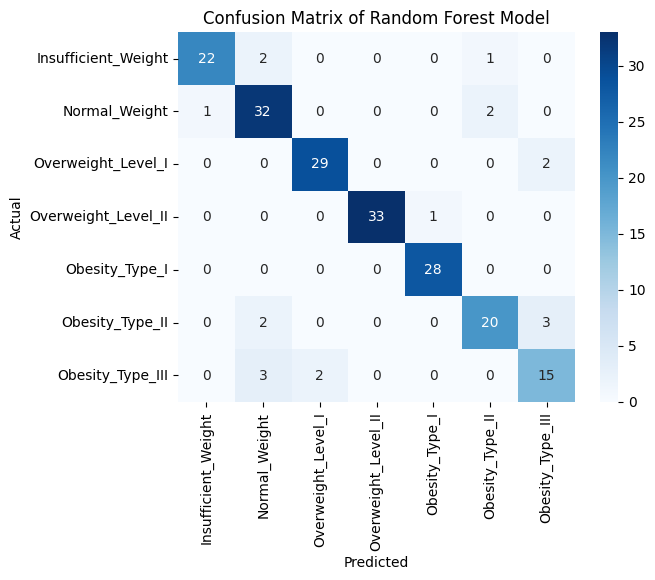

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
random_forest_confusion_matrix = confusion_matrix(y_test_label, random_forest_predict)
labels = target_encoder.get_params()["categories"][0]

sns.heatmap(
    random_forest_confusion_matrix,
    cmap = "Blues",
    annot = True,
    fmt = "g",
    xticklabels = labels,
    yticklabels = labels
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest Model")

plt.show()

The Random Forest model achieves an overall accuracy of 90% and performs very well for classes like `Obesity_Type_II` and `Obesity_Type_III,` with very good precision, recall, and F1-scores. It also handles `Insufficient_Weight` and `Obesity_Type_I` pretty well, with little misclassifications. However, there are problems with `Overweight_Level_I` and `Overweight_Level_II,` where lower precision and recall indicate misclassifications with adjacent weight categories. These errors suggest overlapping features among certain classes. To improve, feature engineering or more hyperparameter tuning could help reduce confusion between similar categories. Overall, the model demonstrates strong performance but could benefit from refinements for borderline cases.

## XGBoost

In [33]:
xgboost_predict = xgboost_best_model.predict(encoded_x_test)

# Inverse transform so the label is visible
xgboost_predict = target_encoder.inverse_transform(xgboost_predict.reshape(-1, 1))
y_test_label = target_encoder.inverse_transform(encoded_y_test.to_numpy().reshape(-1, 1))

In [34]:
# Classification report
xgboost_report = classification_report(y_test_label, xgboost_predict)
print(xgboost_report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        25
      Normal_Weight       0.97      0.91      0.94        35
     Obesity_Type_I       0.97      0.97      0.97        31
    Obesity_Type_II       1.00      0.97      0.99        34
   Obesity_Type_III       1.00      1.00      1.00        28
 Overweight_Level_I       0.88      0.88      0.88        25
Overweight_Level_II       0.87      1.00      0.93        20

           accuracy                           0.95       198
          macro avg       0.95      0.96      0.95       198
       weighted avg       0.96      0.95      0.95       198



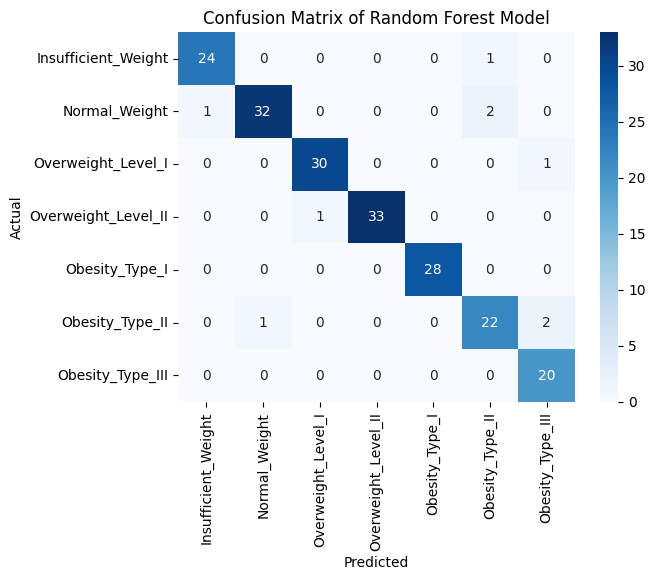

In [35]:
# Confusion matrix
random_forest_confusion_matrix = confusion_matrix(y_test_label, xgboost_predict)
labels = target_encoder.get_params()["categories"][0]

sns.heatmap(
    random_forest_confusion_matrix,
    cmap = "Blues",
    annot = True,
    fmt = "g",
    xticklabels = labels,
    yticklabels = labels
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest Model")

plt.show()

The XGBoost model achieves an impressive overall accuracy of 95% with strong class-specific performance. It perfectly classifies `Obesity_Type_I` with perfect precision, recall, and F1-scores of 1.00. Whilst classes like `Obesity_Type_II,` and `Obesity_Type_III` performs exceptionally with F1-scores of 0.97 and 0.99 respectively. Other classes like `Insufficient_Weight` and `Overweight_Level_II` also perform pretty well, with F1-scores of 0.96 and 0.93. However, the model struggles just a slight bit with `Overweight_Level_I,` where precision and recall hover around 89%, indicating minor misclassifications, such as `Normal_Weight` being confused with `Insufficient_Weight` and `Obesity_Type_III.` Overall, the XGBoost model outperforms the Random Forest model, particularly in handling difficult classes, and demonstrates remarkable performance across all categories.

Note: The model will be retrained with the best XGBoost parameter in `/api/scripts/create_model.py`